In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import cv2
from tqdm import tqdm

- Lectura de Datos CSV.

In [25]:
all_labels = pd.read_csv('./data/train_data.csv')

In [26]:
TRAIN_SIZE = 0.85
split_index = round(all_labels.id.count() * TRAIN_SIZE)

In [27]:
train_labels = all_labels.loc[0:split_index - 1]
test_labels = all_labels.loc[split_index:]

In [29]:
print(f'Train amount: {train_labels.id.count()}')
print(f'Test amount: {test_labels.id.count()}')

Train amount: 10719
Test amount: 1892


# Datos

- Analisis de tipo de datos

In [3]:
train_labels.dtypes

id         int64
boneage    int64
male        bool
dtype: object

Id y bonage cuantitativas y male cualitativa

- Conteo de ejemplos disponibles en train

In [4]:
train_labels['id'].count()

12611

Analisis de tipo de datos de test

In [5]:
test_labels.dtypes

Case ID     int64
Sex        object
dtype: object

Case ID cuantitativa y Sex cualitativa, Sex y Male no concuerdan por lo que se debe realizar un cambio para siguiente entrega

- Conteo de ejemplos disponibles para test

In [6]:
test_labels['Case ID'].count()

200

-Analisis de distribucion de datos train test

In [7]:
(12611*100)/12811

98.43884162048239

Separacion 98.4% para train y 1.6% para test. No se encuentran bien balanceadas para siguiente entrega escoger 70-30 u 80-20

# Histogramas

### Edad de huesos

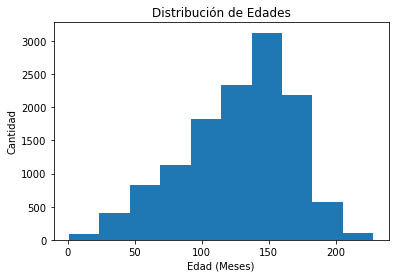

In [8]:
fig, ax = plt.subplots()
plt.hist(train_labels['boneage'])
ax.set_title('Distribución de Edades')
ax.set_xlabel('Edad (Meses)')
ax.set_ylabel('Cantidad')
ax.grid(False)
plt.show()

-Histograma revela que hay mas tendencia de 130-150

### Sexo

In [9]:
male2=[]
for i in train_labels['male']:
    if i==True:
        male2.append("M")
    else:
        male2.append("F")   

In [10]:
train_labels['male2']=male2

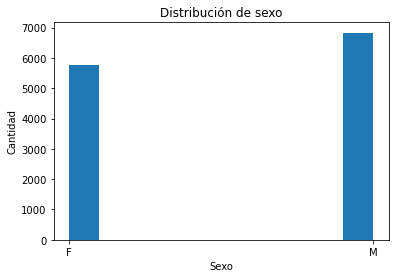

In [11]:
fig, ax = plt.subplots()
plt.hist(train_labels['male2'])
ax.set_title('Distribución de sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Cantidad')
ax.grid(False)
plt.show()

Histograma revela que no hay mucha diferencia entre la catidad de masculino y femenino

# Tablas de frecuencia

### Tabla de sexos

In [12]:
pd.value_counts(train_labels['male'])

True     6833
False    5778
Name: male, dtype: int64

In [13]:
(100*6833)/(6833+5778)

54.182856236618825

Como se revelo previamente en el histograma no hay mucha diferencia. Es 46-54 por lo que se dejara igual.

In [14]:
pd.value_counts(train_labels['male2'])

M    6833
F    5778
Name: male2, dtype: int64

### Tabla de edad de huesos

In [15]:
pd.value_counts(train_labels['boneage'])

156    1113
132    1084
120     992
168     892
162     682
       ... 
117       1
133       1
129       1
107       1
20        1
Name: boneage, Length: 160, dtype: int64

# Estadistica Descriptiva

### Descripcion de edad de huesos

In [16]:
train_labels["boneage"].describe()

count    12611.000000
mean       127.320752
std         41.182021
min          1.000000
25%         96.000000
50%        132.000000
75%        156.000000
max        228.000000
Name: boneage, dtype: float64

### Correlacion

In [17]:
train_labels.corr()

,id,boneage,male
id,1.000000,-0.023748,-0.012104
boneage,-0.023748,1.000000,0.210809
male,-0.012104,0.210809,1.000000


Tabla de correlacion no demuestra nada interesante al ser tan pocas variables

### BoxPlot

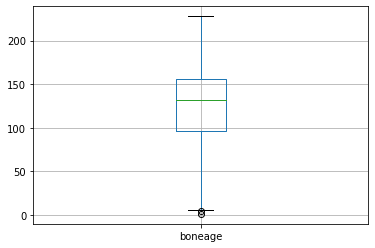

In [19]:
train_labels.boxplot('boneage')

Se realizó un gráfico de caja y bigotes del Boneage y se vuelve a demostrar que está un poco más orientado a valores un poco altos y no están tan centrados.

# Imagenes

In [64]:
import torch
from torchvision import datasets, transforms

Tamaño - 128x128
Crop - True at center

In [71]:
transform = transforms.Compose([transforms.Resize(128), transforms.CenterCrop(128), transforms.ToTensor()])
dataset = datasets.ImageFolder('./data/boneage-training-dataset', transform=transform)

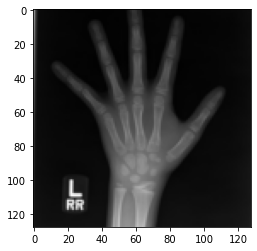

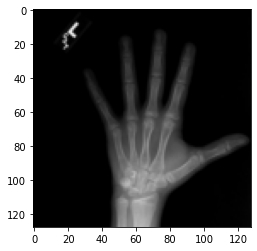

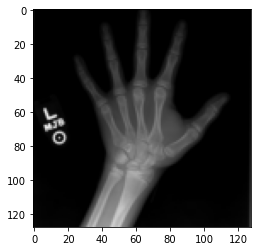

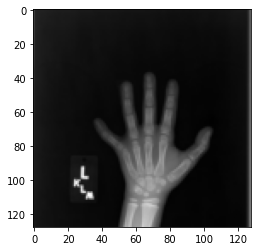

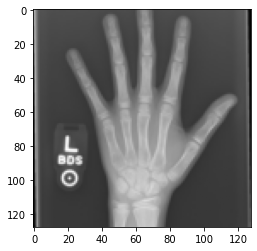

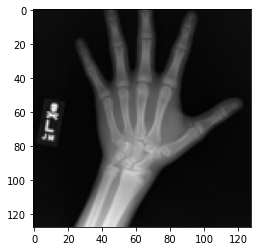

In [79]:
# Cargar imagenes a enseñar
showcase = torch.utils.data.DataLoader(dataset, batch_size=6, shuffle=False, num_workers=4)

dataiter = iter(showcase)
images, labels = dataiter.next()

for index, img in enumerate(images):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [38]:
IMG_SIZE = 128
GAUSS_KERNEL_SIZE = (0, 0)
GAUSS_SIGMA_X = 50
WEIGHT = 4
def apply_gauss_blur(img, ksize=(0,0), sigma_x=50, gamma=128):
    """
    Aplicar Gaussian Blur a img.
    """
    gauss = cv2.GaussianBlur(img, ksize, sigma_x)
    img = cv2.addWeighted(img, WEIGHT, gauss, -WEIGHT, gamma)
    
    return img

In [39]:
train_images = train_labels['id']
test_images = test_labels['id']

In [41]:
for i in tqdm(range(len(train_images))):
    img_id = train_images.loc[i]
    img = cv2.imread(f'./data/train_img/boneage-training-dataset/{img_id}.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = crop_image(img)
    img = apply_gauss_blur(img)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    cv2.imwrite(f'./data/preprocessed/train/{img_id}.png', img)

  0%|          | 7/10719 [00:03<1:34:43,  1.88it/s]


KeyboardInterrupt: 